# My First Notebook

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nfl = pd.read_csv('data.csv')
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [3]:
nfl['result'].value_counts()

W    284
L    284
T      2
Name: result, dtype: int64

In [4]:
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

nfl.replace(result_encoder, inplace=True)

nfl['result'].value_counts()

0    286
1    284
Name: result, dtype: int64

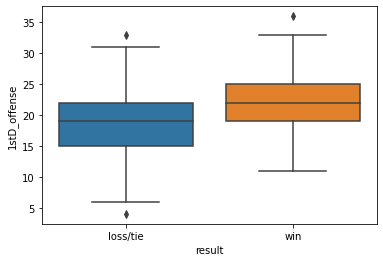

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [5]:

stat = '1stD_offense'

stat_plot = sns.boxplot(x='result', y=stat, data=nfl)

stat_plot.set_xticklabels(['loss/tie','win'])
plt.show()

print(nfl.columns[8:])

In [6]:
features = nfl.iloc[:,8:]
scaler = StandardScaler()

scaler.fit(features)

X = scaler.transform(features)



In [7]:
y = nfl['result']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [9]:
lrc = LogisticRegression()

lrc.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = lrc.predict(X_test)

accuracy_score(y_test, y_pred)

0.8280701754385965

In [11]:
# create a list of penalties
penalties = ['l1', 'l2']
# create a list of values for C
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:

        # instantiate the classifier
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')

        # fit the classifier to the training data
        lrc_tuned.fit(X_train, y_train)
        
        # predict with the classifier using the .predict() function
        y_pred = lrc_tuned.predict(X_test)

        # view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


In [12]:
# optimal penalty and C
penalty = 'l1'
C = 0.1

# create a list of test_sizes
test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    # fit the classifier to the training data
    lrc_tts.fit(X_train, y_train)

    # predict with the classifier using the .predict() function
    y_pred = lrc_tts.predict(X_test)

    # view the model accuracy with the accuracy_score() function
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    # print accuracy for each combination of penalty and test size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


In [13]:
# set the test size and hyperparameters
test_size = 0.25
penalty = 'l1'
C = 0.1

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

# fit the classifier to the training data
optLr.fit(X_train, y_train)



LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

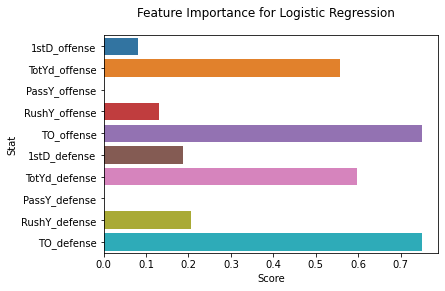

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [14]:


# get importance
importance = abs(optLr.coef_[0])

# visualize feature importance
sns.barplot(x=importance, y=features.columns)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()


# summarize feature importance
for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')



In [15]:


# set team abbreviation (in capitals) and year
team = 'New York Giants'
year = 2022


